In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

# Funzioni Utiliy

In [4]:
def statistics(df, perc_categorical=0.80):
    """
    Get input a dataframe and foreach column make statistics

    Parameters
    ---------
    df: pandas.Dataframe
    Dataframe objects of statistics
    perc_categorical: float
    Upper bound of unique record, under that percentage a fields is categorical

    Return
    ------
    pandas.Dataframe
    A data frame of statistics
    
    """
    n, m =df.shape
    result = pd.DataFrame(columns =('Fields', 'Unique Row','% Unique', 'N° Missing', '% Missing', 'Field Type','Max','Min','Mean','Var','Kurt'))
    cols = list(df.columns)
    # For each filed infer type
    for i in range (0,len(cols)):
        # Categorical: if unique elements are less than specific perc 
        # String: if a sum of column is a string
        # Numeric: Default
        cnt = len(df[cols[i]].value_counts(dropna=False))
        missing = df[cols[i]].isnull().sum()
        perc_cnt = float(cnt) /float(n)
        col_max = 0
        col_min = 0
        col_mean = 0
        col_var = 0
        col_kur = 0
        if  perc_cnt < perc_categorical:
            fields_type="Categorical"
        elif isinstance(df[cols[i]].sum(), str):
            fields_type="String"
        else:
            fields_type="Numeric"
            col_max=df[cols[i]].max()
            col_min=df[cols[i]].min()
            col_mean=df[cols[i]].mean()  
            col_var=df[cols[i]].var()
            col_kur=df[cols[i]].kurtosis()
        
        result.loc[i] = [cols[i], cnt, perc_cnt, missing, float(missing)/float(n), fields_type, col_max, col_min, col_mean, col_var, col_kur]
    return result

def optimize_width(X):
    """Get number of element of abscisssa and return optimal width of histogram"""
    i = 6
    while ((i/0.70)<len(X)):
        i+=1
    return i

def bar_chart_simple(col, title, p_xlabel='', p_ylabel='Frequenza'):
    """
    Print a bar chart

    Parameters
    ---------
    col: pandas.Series
    Series of data
    title: String
    Title of plot
    p_xlabel: String
    Label for x
    p_ylabel: String
    Label for y

    """
    x = [i for i in range(1,len(col.index)+1)]
    xlabels=list(col.index)
    y = col.values
    tot=col.sum()
    for i in range(0, len(y)):
        xlabels[i] = "%.2f\n%s" %(float(y[i])/float(tot), str(xlabels[i]).replace(" ","\n"))

    plt.figure(figsize=(optimize_width(x), 4))
    plt.bar(x,y, label=p_ylabel, color="#1569C7")
    plt.xlabel(p_xlabel)
    plt.xticks(x, xlabels)
    plt.ylabel(p_ylabel)
    plt.title(title)
    plt.legend()
    
    plt.show()

In [5]:
# Read anac json
df = pd.read_json('data/l190-2017.json')
df.head()

,codiceFiscale,dataUltimoTentativoAccessoUrl,esitoUltimoTentativoAccessoUrl,identificativoPEC,ragioneSociale,url
0,93000840301,2017-03-24T18:15:00.937+0000,fallito,42FBDC6B-A5A1-543A-F45A-AFC701BB8921@telecompo...,REGIONE MILITARE NORD EST-BASE LOGISTICA DI TA...,http://www.esercito.difesa.it/comunicazione/ba...
1,80049610100,2017-02-28T18:02:25.507+0000,successo,opec282.20170221000011.02218.08.1.6@pec.actali...,ISTITUTO COMPRENSIVO SAN TEODORO,http://www.trasparenzascuole.it/files/4fb9ae16...
2,80006220836,2017-02-28T17:29:51.283+0000,successo,opec282.20170221004642.03431.03.1.64@pec.aruba.it,COMUNE DI LIMINA,http://www.messenia.com/comuni/img/comune/avcp...
3,80004340818,2017-03-24T16:49:37.027+0000,fallito,EEB6503D-F4A4-AACC-3E7F-6F3CE36FB481@telecompo...,DIREZIONE CASA CIRCONDARIALE DI TRAPANI,https://www.giustizia.it/resources/cms/documen...
4,80008080527,2017-03-24T16:57:17.640+0000,fallito,C8374B1B-13E3-B4D7-1485-D9CD94C97648@telecompo...,DIREZIONE CASA CIRCONDARIALE SIENA,https://www.giustizia.it/giustizia/prot/it/con...


**Qual'è la natura delle comunicazioni fallite?** 

In [6]:
# Filtra su fallito
df=df[df['esitoUltimoTentativoAccessoUrl']=='fallito']
# Per visulizzazione definisci un nuovo campo che sia gli ultimi 20 caratteri di url
df['url2']=df['url'].str[-20:]

# Categorizza
# xml: Se url2 contiene .xml categorizza xml
# xls: se url2 cotiene .ls
# altro: default
df["ext"] = df["url2"].map(lambda x: "xml" if ".xml" in x else\
                                   "xls" if ".xls" in x else "altro")
df.head()

,codiceFiscale,dataUltimoTentativoAccessoUrl,esitoUltimoTentativoAccessoUrl,identificativoPEC,ragioneSociale,url,url2,ext
0,93000840301,2017-03-24T18:15:00.937+0000,fallito,42FBDC6B-A5A1-543A-F45A-AFC701BB8921@telecompo...,REGIONE MILITARE NORD EST-BASE LOGISTICA DI TA...,http://www.esercito.difesa.it/comunicazione/ba...,istica-Tarvisio.aspx,altro
3,80004340818,2017-03-24T16:49:37.027+0000,fallito,EEB6503D-F4A4-AACC-3E7F-6F3CE36FB481@telecompo...,DIREZIONE CASA CIRCONDARIALE DI TRAPANI,https://www.giustizia.it/resources/cms/documen...,_art1c32legge190.xls,xls
4,80008080527,2017-03-24T16:57:17.640+0000,fallito,C8374B1B-13E3-B4D7-1485-D9CD94C97648@telecompo...,DIREZIONE CASA CIRCONDARIALE SIENA,https://www.giustizia.it/giustizia/prot/it/con...,contentId=ART1212223,altro
5,80004520815,2017-03-24T16:49:42.570+0000,fallito,FA136F19-D1EC-3FCC-BC9A-227B00CD3533@telecompo...,DIREZIONE CASA DI RECLUSIONE,https://www.giustizia.it/resources/cms/documen...,_art1c32legge190.xls,xls
6,93014300037,2017-03-24T18:18:30.267+0000,fallito,BB780952-CFC1-0FAF-E93F-2C74A1F286C5@cert.inte...,QUESTURA DEL VERBANO CUSIO OSSOLA,http://img.poliziadistato.it/docs/QUESTURA_VER...,000_09-02-2016.xml,xml


In [7]:
# Fai le statistiche di esitoUltimoTentativoAccessoUrl e ext
df_stats= df[['esitoUltimoTentativoAccessoUrl', 'ext']]
df_stats= statistics(df[['esitoUltimoTentativoAccessoUrl', 'ext']])
df_stats

,Fields,Unique Row,% Unique,N° Missing,% Missing,Field Type,Max,Min,Mean,Var,Kurt
0,esitoUltimoTentativoAccessoUrl,1,0.000228,0,0.0,Categorical,0,0,0,0,0
1,ext,3,0.000684,0,0.0,Categorical,0,0,0,0,0


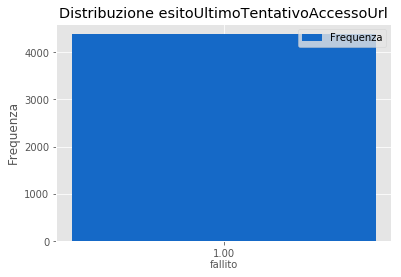

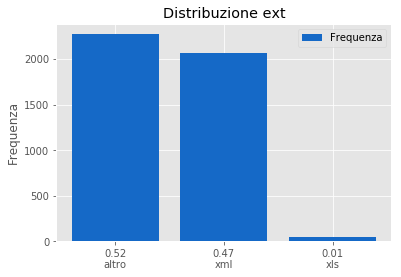

In [8]:
# Plotta     
for field in df_stats['Fields']:
    col = df[field].value_counts(dropna=False)
    titolo = "Distribuzione "+str(field)
    bar_chart_simple(col, titolo)

**Distribuzione dei formati delle sole comunicazione fallite:** una piccola percentuale è caratterizzata da xls, il 47% delle comunicazione fallite sono caratterizzate da xml con schema errato, il 52% delle comunicazioni errate è punta a pagine con una diversa estensione tipicamente pagine web.

In [9]:
from bs4 import BeautifulSoup
import urllib
xml = urllib.urlopen('http://cms.tp-srl.it/comune.cottanello/anac2015/dataset1.xml')
#xml = open('data/test1.xml')
soup = BeautifulSoup(xml, "lxml")

In [10]:
def serialize_field(node, field):
    result = ','.join(y.text for y in node.find_all(field))
    result = np.nan if len(result)==0 else result
    return result

In [11]:
def get_field(node, field):
    try:
        result = node.find(field).text
    except AttributeError:
        result = np.nan

    return result

In [12]:
df_xml = pd.DataFrame({'cig':[], 
                   'codicefiscale_prop': [],
                   'denominazione': [],
                   'oggetto': [],
                   'scelta_contraente': [],
                   'partecipanti': [],
                   'aggiudicatari': [],
                   'importo_aggiudicazione': [],
                   'data_inizio': [],
                   'data_fine': [],    
                   'importo_somme_liquidate': [],
                  })
df_xml = df_xml[['cig', 
                 'codicefiscale_prop', 
                 'denominazione', 
                 'oggetto',
                 'scelta_contraente',
                 'partecipanti',
                 'aggiudicatari',
                 'importo_aggiudicazione',
                 'data_inizio',
                 'data_fine',
                 'importo_somme_liquidate',
                ]]
lotti = soup.find_all("lotto")
for i in range (0, len(lotti)):
    x = lotti[i]

    cig = get_field(x,"cig")
    codicefiscale_prop = x.find("strutturaproponente").find('codicefiscaleprop').text
    denominazione = x.find('strutturaproponente').find('denominazione').text
    oggetto = x.find('oggetto').text
    scelta_contraente = x.find('sceltacontraente').text
    partecipanti = serialize_field(x.partecipanti, "codicefiscale")
    aggiudicatari = serialize_field(x.aggiudicatari, "codicefiscale")
    importo_aggiudicazione = x.find('importoaggiudicazione').text
    data_inizio = get_field(x.tempicompletamento,"datainizio")
    data_fine = get_field(x.tempicompletamento,"dataultimazione")
    importo_somme_liquidate = x.find('importosommeliquidate').text
    
    
    df_xml = df_xml.append(
        pd.Series([cig, codicefiscale_prop, denominazione,
                   oggetto, scelta_contraente, partecipanti,
                   aggiudicatari, importo_aggiudicazione, data_inizio,
                   data_fine, importo_somme_liquidate
                  ], index=list(df_xml.columns)),
        ignore_index=True)

In [14]:
df_xml.head()

,cig,codicefiscale_prop,denominazione,oggetto,scelta_contraente,partecipanti,aggiudicatari,importo_aggiudicazione,data_inizio,data_fine,importo_somme_liquidate
0,570809984D,00100630573,UFFICIO TECNICO,INTERVENTO DI UTILIZZAZIONE SELVICOLTURALE DEL...,02-PROCEDURA RISTRETTA,NaN,NaN,0,2015-01-22,NaN,0
1,589487BE7,00100630573,UFFICIO TECNICO,INTERVENTO DI UTILIZZAZIOEN SELVICOLTURALE DI ...,02-PROCEDURA RISTRETTA,NaN,NaN,0,2015-01-22,NaN,0
2,6117102841,00100630573,UFFICIO TECNICO,VENDITA DEL MATERIALE LEGNOSO RITRAIBILE DAL T...,02-PROCEDURA RISTRETTA,NaN,NaN,0,2015-01-29,NaN,0
3,6001902E33,00100630573,UFFICIO AMMINISTRATIVO,LIQUIDAZIONE FATTURA DITTA T&P SOLUZIONI INFOR...,17-AFFIDAMENTO DIRETTO EX ART. 5 DELLA LEGGE N...,00897990578,00897990578,549.00,2015-02-20,2015-02-26,549.00
4,6001844E56,00100630573,UFFICIO AMMINISTRATIVO,LIQUIDAZIONE FATTURA DITTA MAGGIOLI S.P.A. PER...,17-AFFIDAMENTO DIRETTO EX ART. 5 DELLA LEGGE N...,02066400405,02066400405,384.30,2015-02-20,2015-02-26,384.30


In [167]:
df_xml[df_xml['partecipanti'].str.contains(",", na=np.nan)==True]

,cig,codicefiscale_prop,denominazione,oggetto,scelta_contraente,partecipanti,aggiudicatari,importo_aggiudicazione,data_inizio,data_fine,importo_somme_liquidate
36,62146256C8,00100630573,UFFICIO AMMINISTRATIVO,FORNITURA MATERIALE DI CANCELLERIA PER UFFICI ...,23-AFFIDAMENTO IN ECONOMIA - AFFIDAMENTO DIRETTO,"01006250573,03222970406,00947770574",NaN,4000.00,2015-03-23,2015-12-31,0
48,,00100630573,UFFICIO AMMINISTRATIVO,CONCESSIONE SOVVENZIONI E CONTRIBUTI - IMPEGNO...,23-AFFIDAMENTO IN ECONOMIA - AFFIDAMENTO DIRETTO,"00011650570,90033690570,00904460573","00011650570,90033690570,00904460573",13350.00,2015-07-10,NaN,0
49,,00100630573,UFFICIO AMMINISTRATIVO,LIQUIDAZIONE CONTRIBUTI,23-AFFIDAMENTO IN ECONOMIA - AFFIDAMENTO DIRETTO,"00904460573,90011665057,90033690570","00904460573,90011665057,90033690570",0,2015-07-16,2015-07-16,6275.00
94,653337037B,00100630573,UFFICIO AMMINISTRATIVO,PACCHI DONO AGLI ANZIANI E AGLI HANDICAPPATI I...,23-AFFIDAMENTO IN ECONOMIA - AFFIDAMENTO DIRETTO,"00920670577,01118510575","00920670577,01118510575",2100.00,2015-12-05,NaN,0
97,62146256C8,00100630573,UFFICIO AMMINISTRATIVO,FORNITURA MATERIALEDI CANCELLERIA - INTEGRAZIO...,23-AFFIDAMENTO IN ECONOMIA - AFFIDAMENTO DIRETTO,"01006250573,03222970406,00947770574",NaN,1360.00,2015-12-15,NaN,0
98,6533301A88,00100630573,UFFICIO AMMINISTRATIVO,ACQUISIZIONE MATERIALE VARIO PER UFFICIO TURIS...,23-AFFIDAMENTO IN ECONOMIA - AFFIDAMENTO DIRETTO,"00622910578,01034870574","00622910578,01034870574",871.06,2015-12-15,NaN,0
